# Web Scrape w/Computer Vision

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
import requests
from bs4 import BeautifulSoup

from PIL import Image
import pytesseract

currentPrice = Image.open("C:/Users/ossi/Documents/UWFA/tencentCurrentPrice.jpg")
predictedPrice = Image.open("C:/Users/ossi/Documents/UWFA/tencentPredictedPrice.jpg")

In [8]:
currentPrice

In [9]:
predictedPrice

In [10]:
import pytesseract
from PIL import Image

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

value=Image.open("C:/Users/ossi/Documents/UWFA/tencentCurrentPrice.jpg")
text = pytesseract.image_to_string(value, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
print("text present in images:",text)

text present in images: 50.37


In [11]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

value=Image.open("C:/Users/ossi/Documents/UWFA/tencentPredictedPrice.jpg")
text = pytesseract.image_to_string(value, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
print("text present in images:",text)

text present in images: 53.63


In [12]:
urlStart = 'https://finbox.io/'
startOfURLlist = ['https://finbox.io/AMZN/models/dcf-growth-exit-5yr', 'https://finbox.io/AMZN/models/dcf-revenue-exit-5yr',
                 'https://finbox.io/AMZN/models/dcf-ebitda-exit-5yr', 'https://finbox.io/AMZN/models/dcf-growth-exit-10yr',
                 'https://finbox.io/AMZN/models/dcf-revenue-exit-10yr', 'https://finbox.io/AMZN/models/dcf-ebitda-exit-10yr']
endOfURLlist = ['/models/dcf-growth-exit-5yr', '/models/dcf-revenue-exit-5yr', '/models/dcf-ebitda-exit-5yr',
               '/models/dcf-growth-exit-10yr', '/models/dcf-revenue-exit-10yr', '/models/dcf-ebitda-exit-10yr']
#URLlist = ['https://finbox.io/AMZN/models/dcf-growth-exit-5yr', 'https://finbox.io/AMZN/models/dcf-revenue-exit-5yr',
#                 'https://finbox.io/AMZN/models/dcf-ebitda-exit-5yr', 'https://finbox.io/AMZN/models/dcf-growth-exit-10yr',
#                 'https://finbox.io/AMZN/models/dcf-revenue-exit-10yr', 'https://finbox.io/AMZN/models/dcf-ebitda-exit-10yr']
modellist = ['FiveYearTerminalGrowthExit', 'FiveYearRevenueExit', 'FiveYearEBITDAExit', 'TenYearTerminalGrowthExit', 'TenYearRevenueExit', 'TenYearEBITDAExit']

# Test Scrape

In [18]:
from selenium import webdriver

for i in range(0, len(startOfURLlist)):
    driver = webdriver.Chrome(executable_path=r"C:/Users/ossi/Downloads/chromedriver.exe")
    driver.get(startOfURLlist[i])
    driver.save_screenshot("TCEHY.jpg")
    driver.close()
    from PIL import Image
    img = Image.open("TCEHY.jpg")
    area = (775, 536, 1020, 565)
    cropped_img = img.crop(area)
    cropped_img = cropped_img.convert('RGB')
    cropped_img.save("TCEHYcheck.jpg")
    value=Image.open("C:/Users/ossi/Documents/2018_2019_UW/Spring 2019/TCEHYcheck.jpg")
    text = pytesseract.image_to_string(value, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
    print("text present in images:",text)
    s = text
    s = s.replace('$', '')
    s = s.replace(',', '')
    a,b = s.split(' ', 1)
    a = float(a)
    b = float(b)
    print("Current price:", a) 
    print("Predicted price:", b)
    print("Upside/Downside:", (b / a) - 1)

text present in images: $49.79 $40.59
Current price: 49.79
Predicted price: 40.59
Upside/Downside: -0.18477605944968856


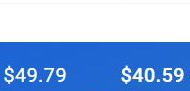

In [19]:
value

# Full Model

In [1]:
import pandas as pd
stocks = pd.read_excel("sp_500_stocks.xlsx")

In [2]:
stocks.drop(stocks.tail(3).index,inplace=True) # drop last n rows

In [143]:
stocksTicker = stocks['Ticker']
stocksName = stocks['Name']

In [144]:
rows = (6 * 505)
columns = 7
valuations = [[0] * columns for i in range(rows)]

In [ ]:
# Print count/ticker next time
# Restart from row 103 in S&P on next iteration

count = 0

for i in range(0, len(stocksTicker)):        
    for j in range(0, len(endOfURLlist)):        
        valuations[count][0] = stocksTicker[i]
        valuations[count][1] = stocksName[i]
        fullURL = urlStart + stocksTicker[i] + endOfURLlist[j]
        valuations[count][2] = fullURL
        driver = webdriver.Chrome(executable_path=r"C:/Users/ossi/Downloads/chromedriver.exe")
        driver.get(fullURL)
        driver.save_screenshot("TCEHY.jpg")
        driver.close()
        valuations[count][3] = modellist[j]
        from PIL import Image
        img = Image.open("TCEHY.jpg")
        area = (775, 536, 1020, 565)
        cropped_img = img.crop(area)
        cropped_img = cropped_img.convert('RGB')
        cropped_img.save("TCEHYcropped.jpg")
        value=Image.open("C:/Users/ossi/Documents/2018_2019_UW/Spring 2019/TCEHYcropped.jpg")
        text = pytesseract.image_to_string(value, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
        print("text present in images:",text)      
        try:
            s = text
            s = s.replace('$', '')
            s = s.replace(':', '0')
            s = s.replace('_', '')
            s = s.replace('(', '')
            s = s.replace(',', '')
            s = s.replace('. ', ' ')
            s = s.replace('ing@', '')
            s = s.replace('> ', '')
            s = s.replace('s ', '')
            s = s.replace('C', '0')
            s = s.replace('!', '0')
            s = s.replace('-', '')
            a,b = s.split(' ', 1)  
            a = float(a)
            b = float(b)
            print(a) 
            print(b)
            print((b / a) - 1)
            valuations[count][4] = a
            valuations[count][5] = b
            valuations[count][6] = (b / a) - 1  
        except ValueError:
            print("error")
            valuations[count][4] = "error"
            valuations[count][5] = "error"
            valuations[count][6] = "error"
        count = count + 1

In [146]:
valuations

[['A',
  'Agilent Technologies Inc.',
  'https://finbox.io/A/models/dcf-growth-exit-5yr',
  'FiveYearTerminalGrowthExit',
  75.57,
  42.88,
  -0.4325790657668386],
 ['A',
  'Agilent Technologies Inc.',
  'https://finbox.io/A/models/dcf-revenue-exit-5yr',
  'FiveYearRevenueExit',
  75.57,
  71.68,
  -0.05147545322217795],
 ['A',
  'Agilent Technologies Inc.',
  'https://finbox.io/A/models/dcf-ebitda-exit-5yr',
  'FiveYearEBITDAExit',
  75.57,
  76.44,
  0.011512504962286618],
 ['A',
  'Agilent Technologies Inc.',
  'https://finbox.io/A/models/dcf-growth-exit-10yr',
  'TenYearTerminalGrowthExit',
  'error',
  'error',
  'error'],
 ['A',
  'Agilent Technologies Inc.',
  'https://finbox.io/A/models/dcf-revenue-exit-10yr',
  'TenYearRevenueExit',
  75.57,
  63.36,
  -0.16157205240174666],
 ['A',
  'Agilent Technologies Inc.',
  'https://finbox.io/A/models/dcf-ebitda-exit-10yr',
  'TenYearEBITDAExit',
  75.57,
  66.64,
  -0.11816858541749364],
 ['AAL',
  'American Airlines Group Inc.',
  'ht

In [281]:
# Make valuations into a dataframe, and then we can sort it by filtering out the errors and seeing which stocks have max upside 
import pandas as pd 

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)  

stocky = pd.DataFrame(valuations, columns=['Ticker', 'Company', 'Link', 'Model', 'CurrentPrice', 'PredictedPrice', 'Upside/Downside'])
stocky = stocky[stocky['Upside/Downside'] != 'error']

filtered = stocky[stocky['Upside/Downside'] != 0]

finalData = filtered[filtered['Upside/Downside'] != -1]
finalData = finalData.sort_values(by=['Upside/Downside'], ascending=False)
finalData

,Ticker,Company,Link,Model,CurrentPrice,PredictedPrice,Upside/Downside
124,AGN,Allergan plc,https://finbox.io/AGN/models/dcf-revenue-exit-10yr,TenYearRevenueExit,140.26,1960,12.974
294,APTV,Aptiv PLC,https://finbox.io/APTV/models/dcf-growth-exit-5yr,FiveYearTerminalGrowthExit,25.56,356.06,12.9304
297,APTV,Aptiv PLC,https://finbox.io/APTV/models/dcf-growth-exit-10yr,TenYearTerminalGrowthExit,25.56,336.35,12.1592
598,CI,Cigna Corporation,https://finbox.io/CI/models/dcf-revenue-exit-10yr,TenYearRevenueExit,147.99,803,4.42604
295,APTV,Aptiv PLC,https://finbox.io/APTV/models/dcf-revenue-exit-5yr,FiveYearRevenueExit,25.56,134.4,4.25822
567,CF,CF Industries Holdings Inc.,https://finbox.io/CF/models/dcf-growth-exit-10yr,TenYearTerminalGrowthExit,44.95,156.18,2.47453
564,CF,CF Industries Holdings Inc.,https://finbox.io/CF/models/dcf-growth-exit-5yr,FiveYearTerminalGrowthExit,44.95,151.65,2.37375
67,ADM,Archer-Daniels-Midland Company,https://finbox.io/ADM/models/dcf-revenue-exit-5yr,FiveYearRevenueExit,42.66,124.63,1.92147
11,AAL,American Airlines Group Inc.,https://finbox.io/AAL/models/dcf-ebitda-exit-10yr,TenYearEBITDAExit,33.48,76.24,1.27718
7,AAL,American Airlines Group Inc.,https://finbox.io/AAL/models/dcf-revenue-exit-5yr,FiveYearRevenueExit,33.48,73.57,1.19743


# More CV

In [278]:
value=Image.open("C:/Users/ossi/Documents/2018_2019_UW/Spring 2019/TCEHYcropped.jpg")
text = pytesseract.image_to_string(value, config='--psm 10 --oem 3 -c tessedit_char_whitelist=0123456789')
print("text present in images:",text)

text present in images: Fair Value: $40.59


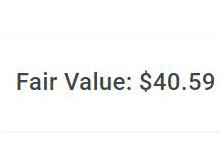

In [279]:
value